In [1]:
import os 
import pandas as pd
import numpy as np
import sys

# Add the root directory of your project to the Python path
sys.path.append('/Users/atharv/MLProjects/BostonHousingPrediction/boston-housing-prediction')

from boston_housing_prediction.ingest_data import DataIngestorFactory

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis, CategoricalVsCategoricalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# Ingest and load data
# Assuming you have not extracted the data into the 'extracted-data' folder

file_path = os.path.join('..', 'data', 'archive.zip')
file_extension = os.path.splitext(file_path)[1]

data_ingestor = DataIngestorFactory.get_data_ingestor(file_extension)

df = data_ingestor.ingest(file_path)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Basic Data Inspection

In [3]:
# Initialize the Data Inspector with a strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [4]:
# Switch to Summary Statistics Strategy
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534 

ValueError: No objects to concatenate

### Insights:
- The data includes 506 entries
- MEDV is the target variable
- All features appear to be numeric
- the maximum MEDV is 50
- the average MEDV is 22.533
- furthur analysis on individual features in needed.

## Missing Values Detection


Missing Values Count by Column:
Series([], dtype: int64)

Visualizing Missing Values...


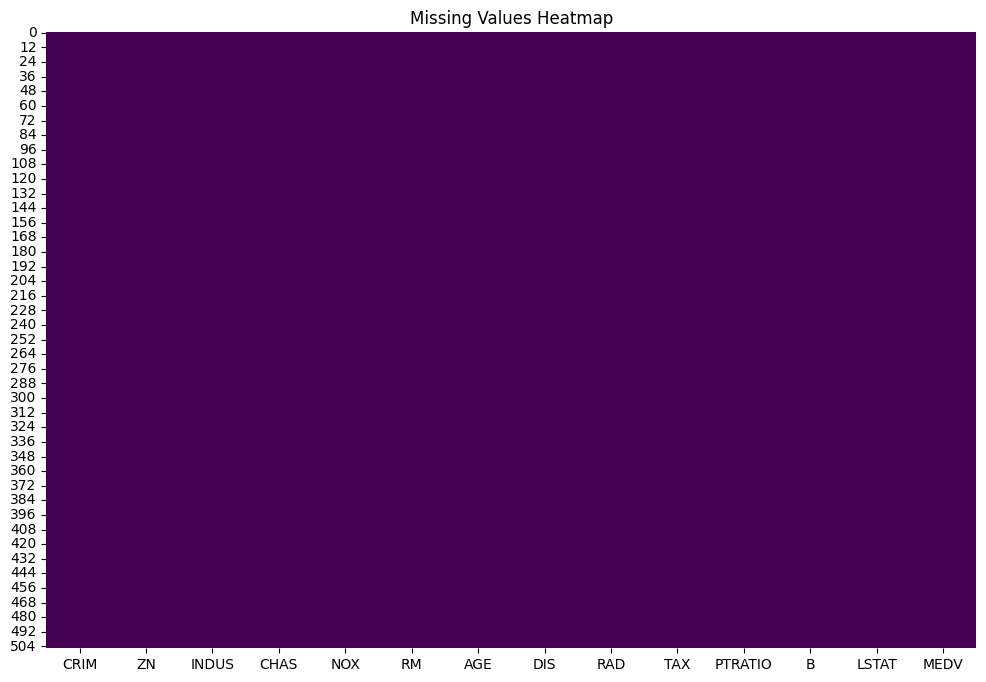

In [5]:
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

### Insights:
- No missing values detected in the dataset.

## Univariate Analysis

### CRIM

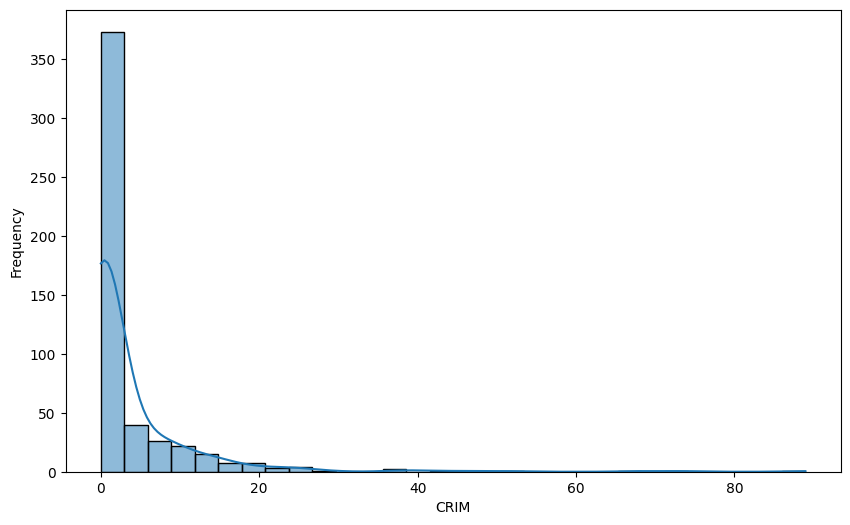

In [6]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "CRIM")

### Insights:
- CRIM (per capita crime rate by town) is highly skewed.
- Most towns have a CRIM of lower than 20.
- Majority of towns have a low CRIM value.

### ZN

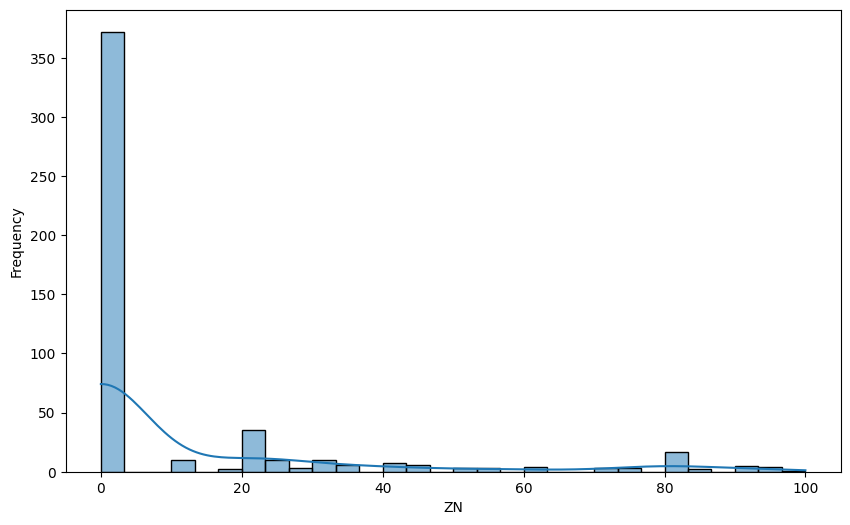

In [7]:
univariate_analyzer.execute_analysis(df, "ZN")

/Users/atharv/MLProjects/BostonHousingPrediction/boston-housing-prediction/analysis/analyze_src/univariate_analysis.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


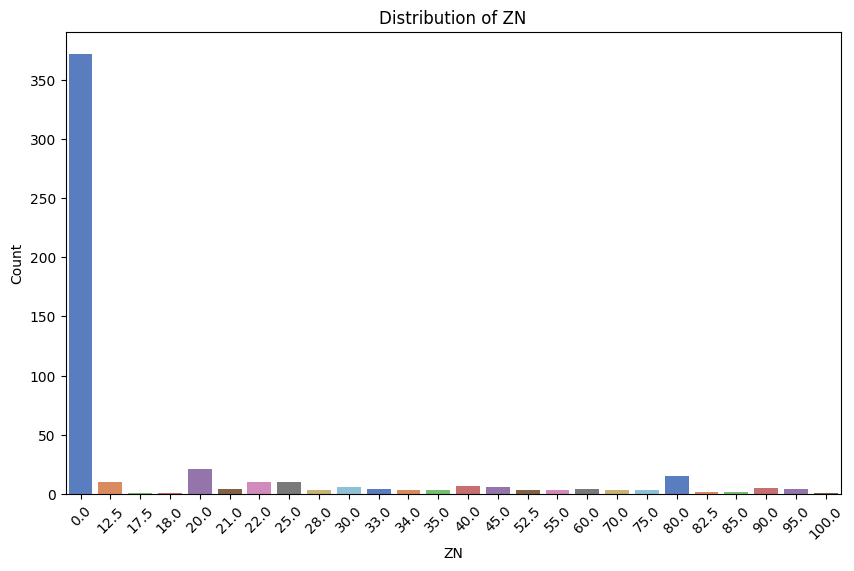

In [8]:
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "ZN")

### Insights:
- ZN (proportion of residential land zoned for lots over 25,000 sq. ft.) distribution seems highly skewed.
- The values of ZN are discrete and maybe considered as conditional.

### INDUS

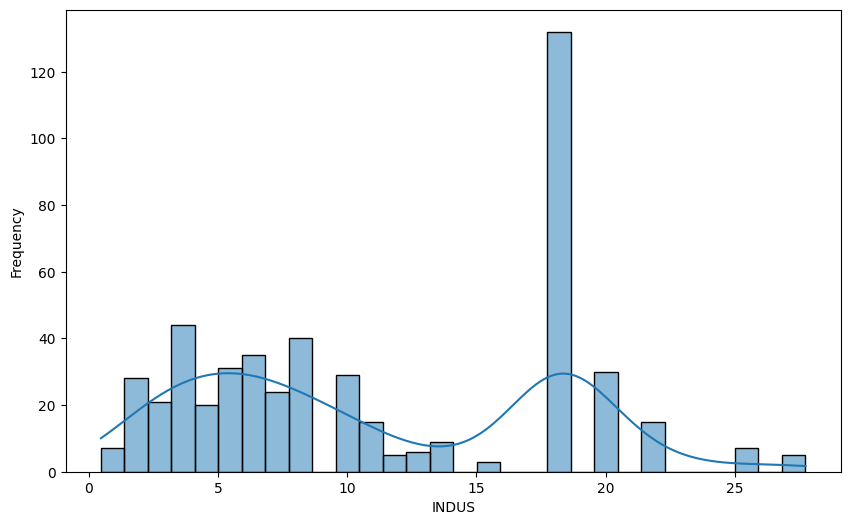

In [9]:
univariate_analyzer.set_strategy(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "INDUS")

### Insights:
- INDUS (proportion of non-retail business acres per town) have an uneven distribution with over 120 towns with around 18 or 19 INDUS.

### CHAS

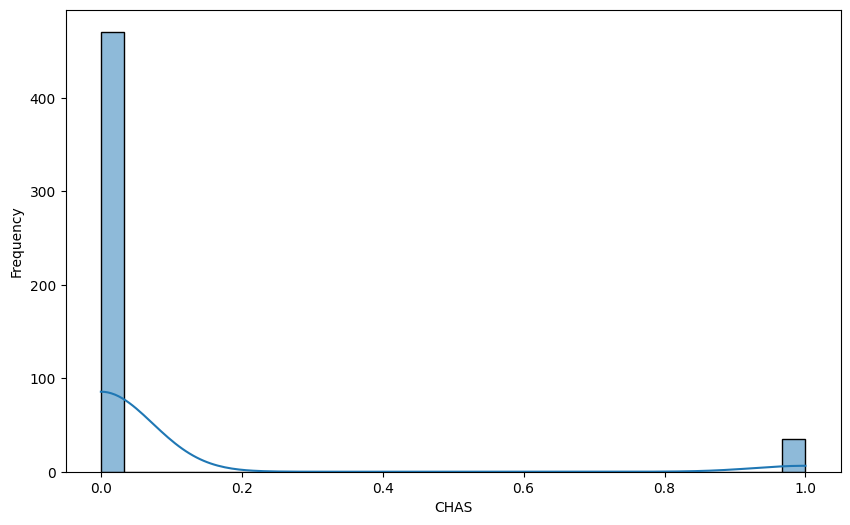

In [10]:
univariate_analyzer.execute_analysis(df, "CHAS")

/Users/atharv/MLProjects/BostonHousingPrediction/boston-housing-prediction/analysis/analyze_src/univariate_analysis.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


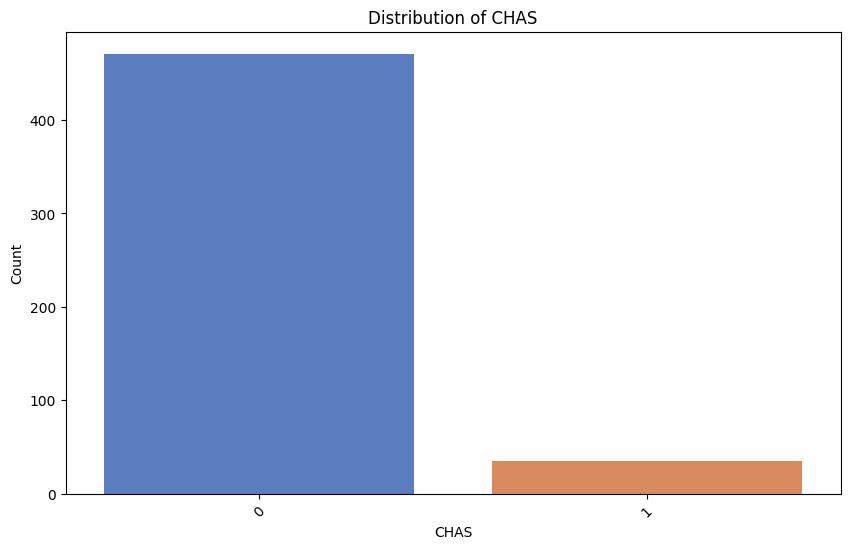

In [11]:
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "CHAS")

### Insights:
- Heavy imbalance for CHAS (Charles River dummy variable (1 if tract bounds river; 0 otherwise))
- This suggest majority towns do not have their tracts bound the Charles River.
- CHAS can be considered as a Categorical Feature.

### NOX

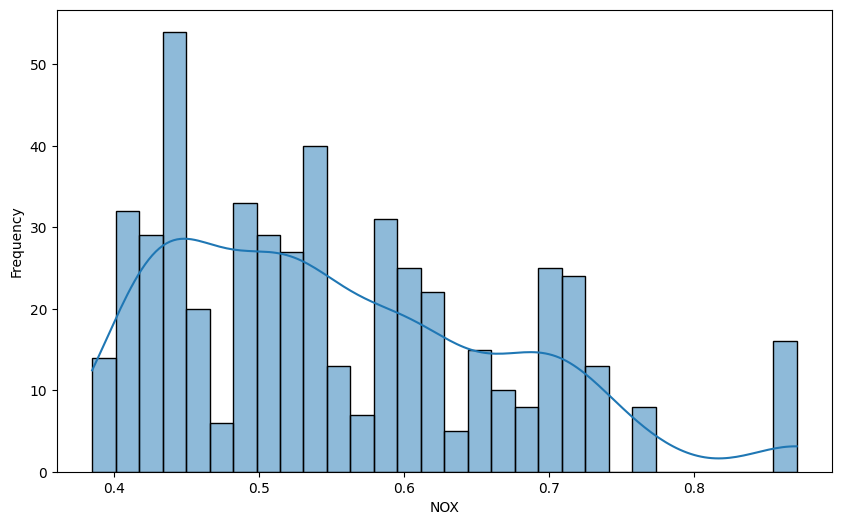

In [12]:
univariate_analyzer.set_strategy(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "NOX")

### Insights:
- NOX (nitric oxide concentration in ppm) is very slightly skewed but is fairly normally distributed.
- Over 15 towns have NOX greater than 0.8 ppm.

### RM

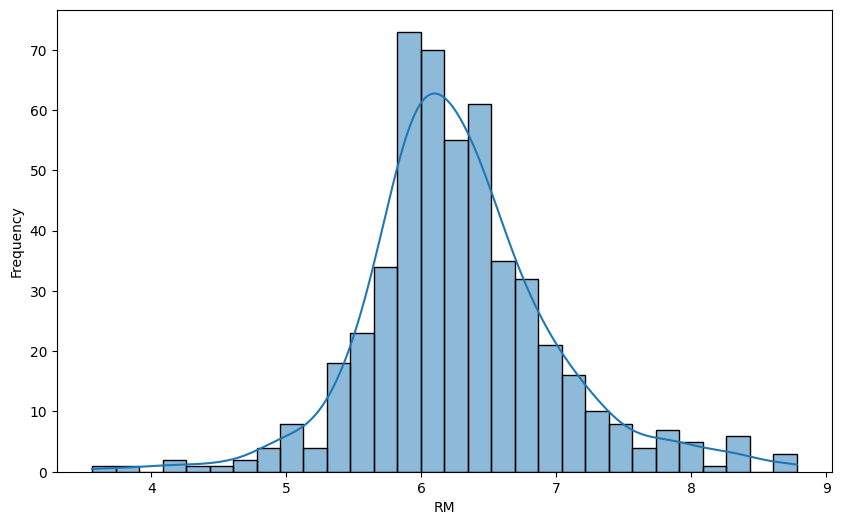

In [13]:
univariate_analyzer.execute_analysis(df, "RM")

### Insights:
- RM (average no of rooms per dwelling) is normally distributed with most frequent RM of around 6.

### AGE

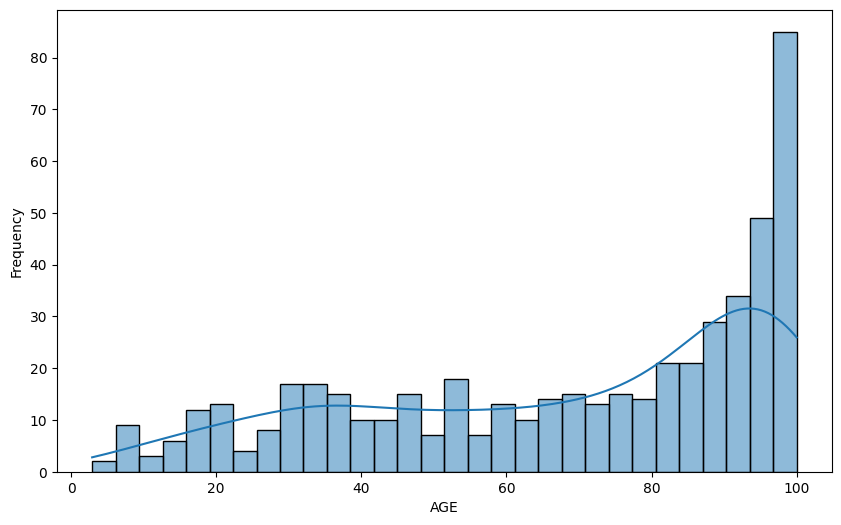

In [14]:
univariate_analyzer.execute_analysis(df, "AGE")

### Insights:
- AGE (proportion of owner-occupied units built prior to 1940) is highly skewed.
- Indicating that most of the houses are older than 1940.

### DIS

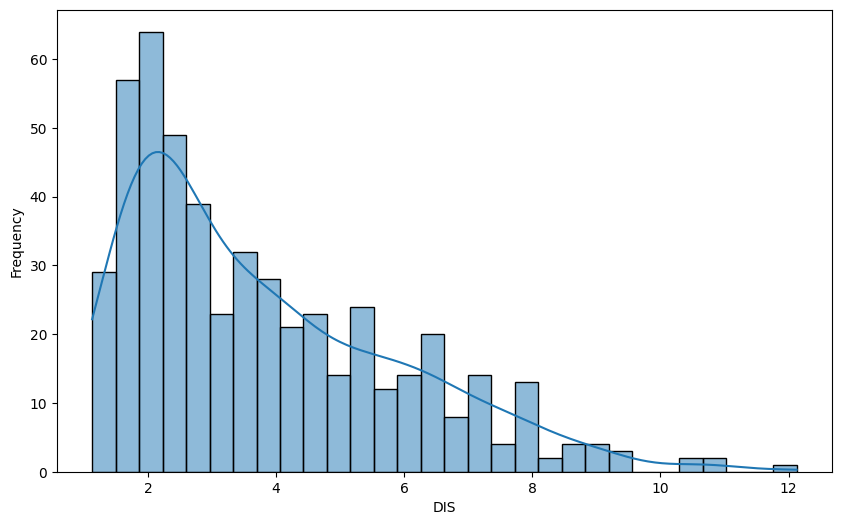

In [15]:
univariate_analyzer.execute_analysis(df, "DIS")

### Insights:
- DIS (weighted distances to five Boston employment centres) is skewed to the left.
- Most common DIS is around 2.

### RAD

/Users/atharv/MLProjects/BostonHousingPrediction/boston-housing-prediction/analysis/analyze_src/univariate_analysis.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


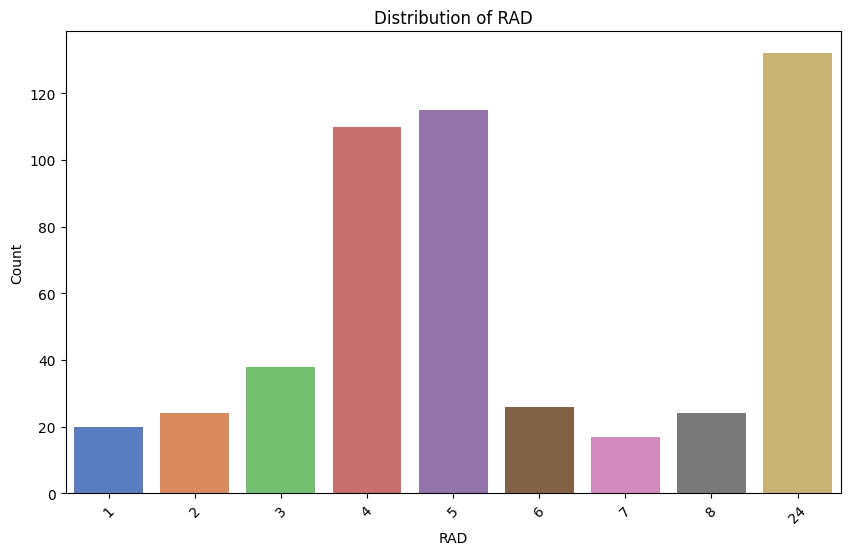

In [16]:
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "RAD")

### Insights:
- RAD (index of accessibility to radial highways) have discrete values and can be considered as categorical.

### TAX

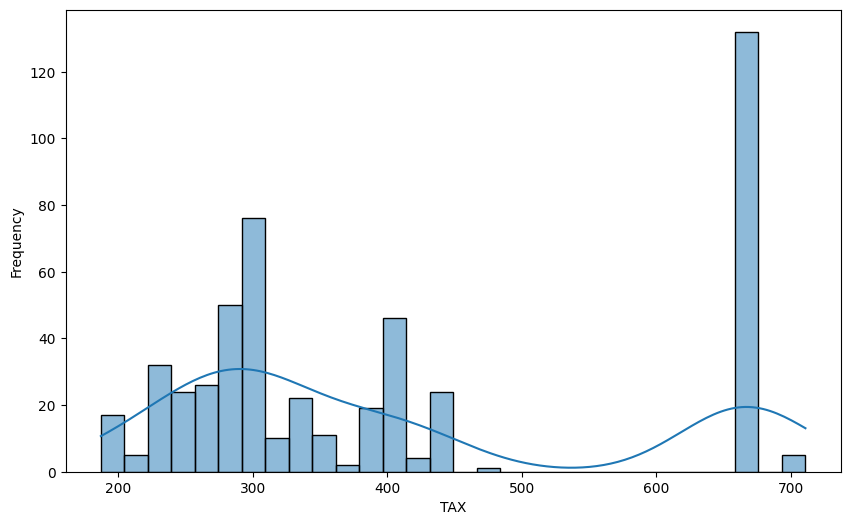

In [17]:
univariate_analyzer.set_strategy(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "TAX")

### Insights:
- TAX (full-value property-tax rate per $10,000) is skewed to the right.

### PTRATIO

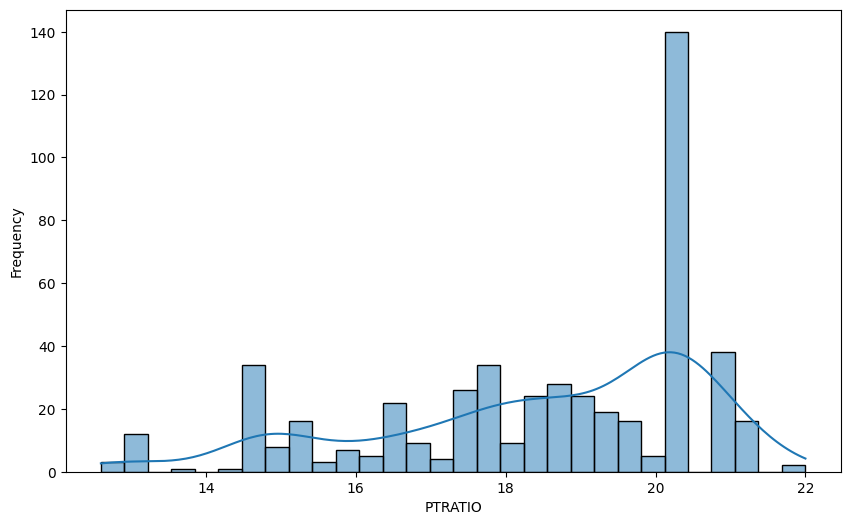

In [18]:
univariate_analyzer.execute_analysis(df, "PTRATIO")

### Insights:
- PTRATIO (pupil-teacher ratio by town) is skewed to the right.
- This feature is not very important for housing prices

### B

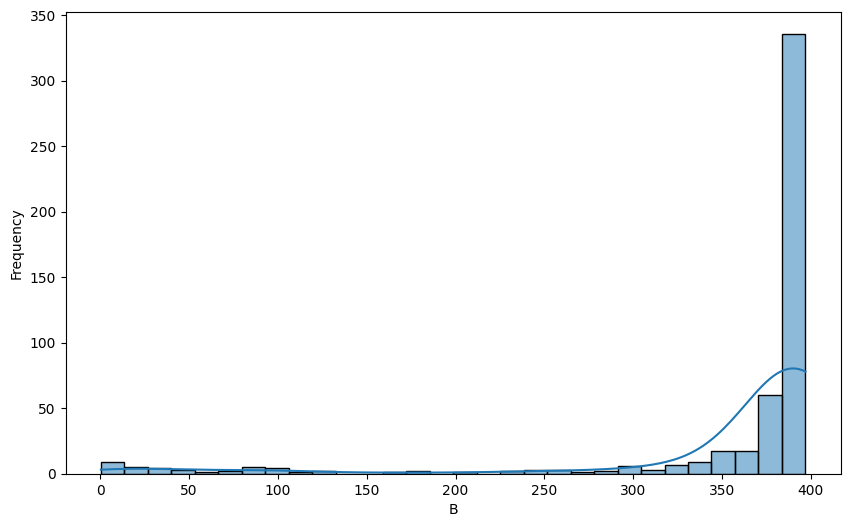

In [19]:
univariate_analyzer.execute_analysis(df, "B")

### Insights:
- B ( B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town) is skewed to the right.
- There is imbalance of Blacks proportion in the dataset.

### LSTAT

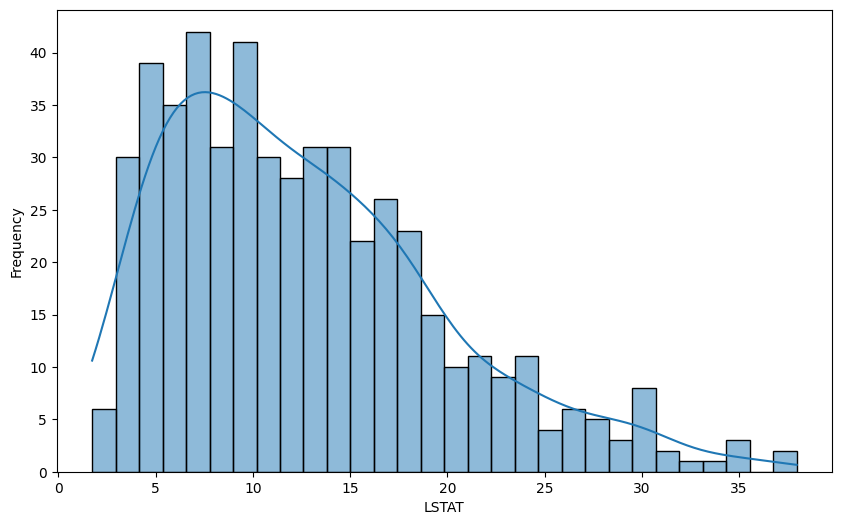

In [20]:
univariate_analyzer.execute_analysis(df, "LSTAT")

### Insights:
- LSTAT (% lower status of the population) is skewed to the left.
- There are more lower status population than higher which is logical.

### MEDV

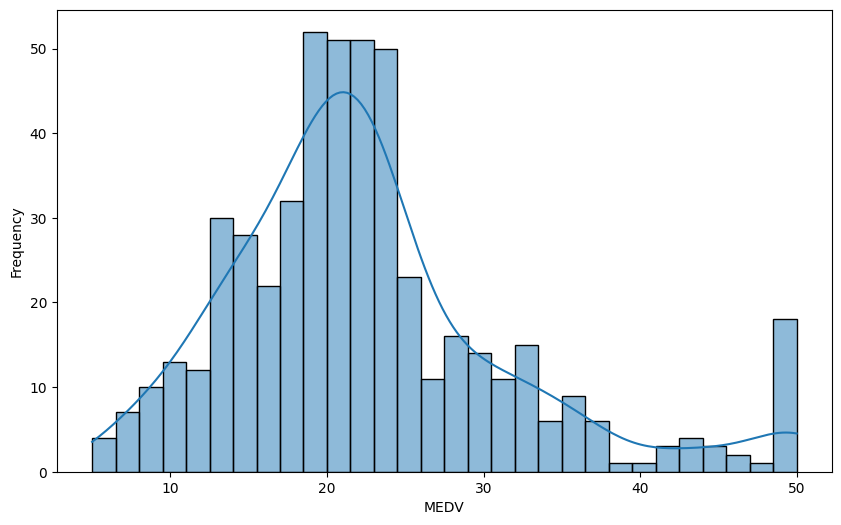

In [21]:
univariate_analyzer.execute_analysis(df, "MEDV")

### Insights:
- MEDV (Median value of owner-occupied homes in $1000's [k$]) is normally distributed.
- Its the target variable.

## Bivariate Analysis

### CRIM VS MEDV

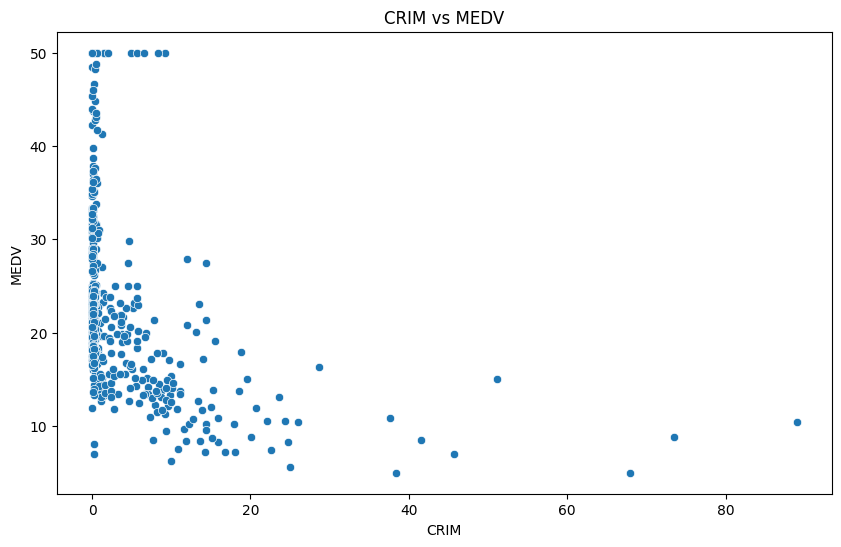

In [22]:
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.analyze(df, 'CRIM', 'MEDV')

### Insights:
- CRIM AND MEDV are negatively correlated. 
- Higher crime rates are associated with lower home pricing

### ZN VS MEDV

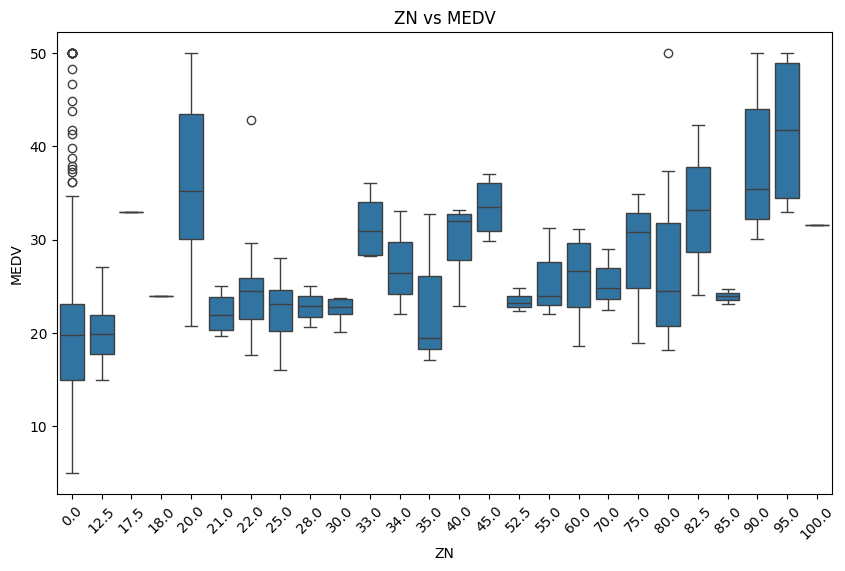

In [23]:
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.analyze(df, 'ZN', 'MEDV')

### Insights:
- ZN AND MEDV are positively correlated. 
- Areas with more residential zoning tend to have higher median home values.
- Some zoning levels show a large spread in home prices, indicating mixed property values.
- A significant portion of the data has ZN = 0, meaning many areas have no large residential zoning.

### INDUS VS MEDV

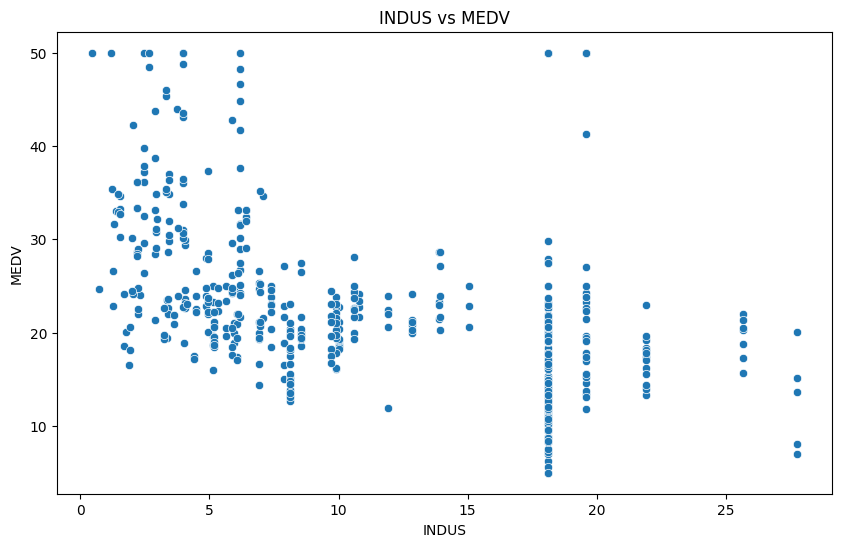

In [24]:
bivariate_analyzer.set_strategy(NumericalVsNumericalAnalysis())
bivariate_analyzer.analyze(df, 'INDUS', 'MEDV')

### Insights:
- INDUS AND MEDV are weak negatively correlated.
- As INDUS (industrial area proportion) increases, home values (MEDV) tend to decrease slightly.
- Expensive homes are mostly found in areas with low industrial proportion (<10).
- A wide range of home prices exists in low industrial areas, but fewer high-value homes appear in highly industrial zones.

### CHAS VS MEDV

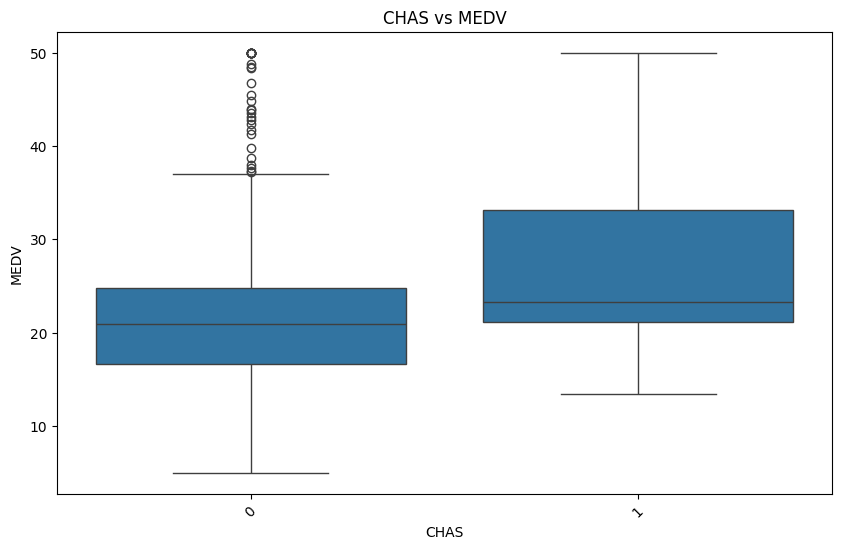

In [25]:
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.analyze(df, 'CHAS', 'MEDV')

### Insights:
- Homes Near the Charles River Are More Expensive
- The spread of home prices is smaller for river-adjacent properties, suggesting a more consistent price range.

### NOX VS MEDV

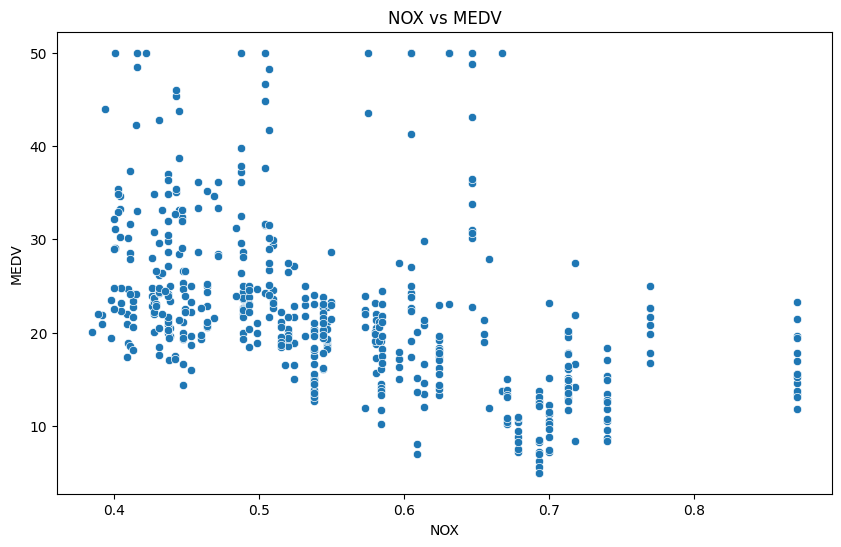

In [26]:
bivariate_analyzer.set_strategy(NumericalVsNumericalAnalysis())
bivariate_analyzer.analyze(df, 'NOX', 'MEDV')

### Insights:
- NOX and MEDV have negative correlation.
- Higher NOX (air pollution) levels are generally associated with lower home prices (MEDV).
- More Expensive Homes in Low NOX Areas.

### RM VS MEDV

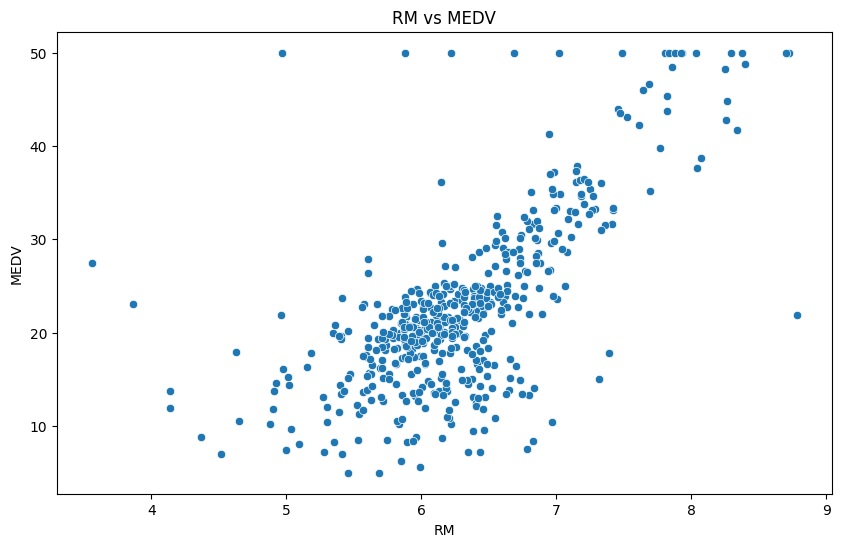

In [27]:
bivariate_analyzer.analyze(df, 'RM', 'MEDV')

### Insights:
- RM and MEDV have strong positive correlation.
- The relationship appears roughly linear, meaning price increases steadily as the number of rooms increases.
- More rooms per dwelling (RM) generally lead to higher home prices (MEDV).

### AGE VS MEDV

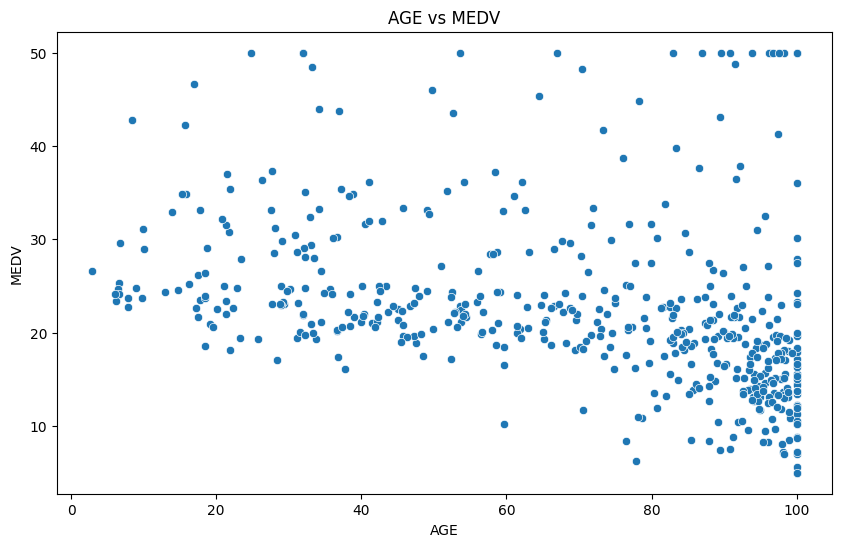

In [28]:
bivariate_analyzer.analyze(df, 'AGE', 'MEDV')

### Insights:
- RM and MEDV have weak negative correlation.
- As the proportion of older homes (AGE) increases, home prices (MEDV) tend to decrease, but the trend is not strong.
- Many homes with AGE > 80% are priced below $20K, indicating older homes tend to have lower prices.
- For AGE < 40%, home prices vary significantly, with some reaching $50K, showing more price diversity for newer homes.

### DIS VS MEDV

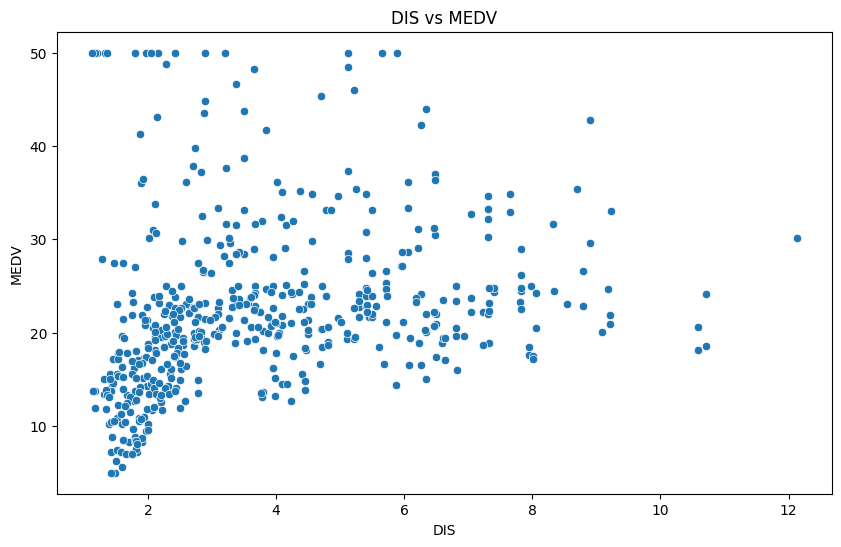

In [29]:
bivariate_analyzer.analyze(df, 'DIS', 'MEDV')

### Insights:
- DIS and MEDV have slight positive correlation.
- Homes closer to employment centers (lower DIS) tend to have lower prices, while those farther away (higher DIS) tend to be more expensive.
- Many high-priced homes (MEDV ~50K) are still close to employment centers, indicating location is not the only factor affecting price.
- Most homes are within 2-5 distance units, suggesting a concentration of real estate near employment hubs.

### RAD VS MEDV

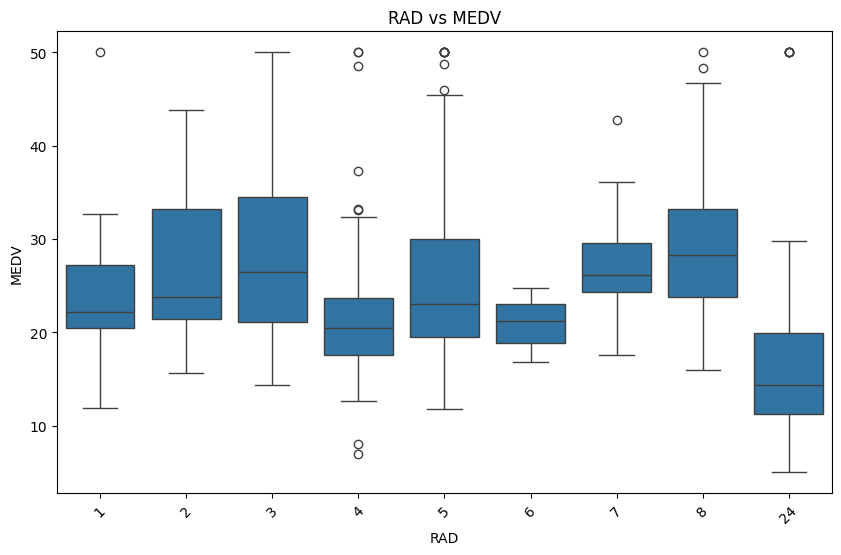

In [30]:
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.analyze(df, 'RAD', 'MEDV')

### Insights:
- There is no clear trend indicating that better highway accessibility (higher RAD values) leads to higher or lower home prices.
- Homes with the highest accessibility to highways (RAD=24) tend to have lower median prices, suggesting proximity to highways may not always be desirable.

### TAX VS MEDV

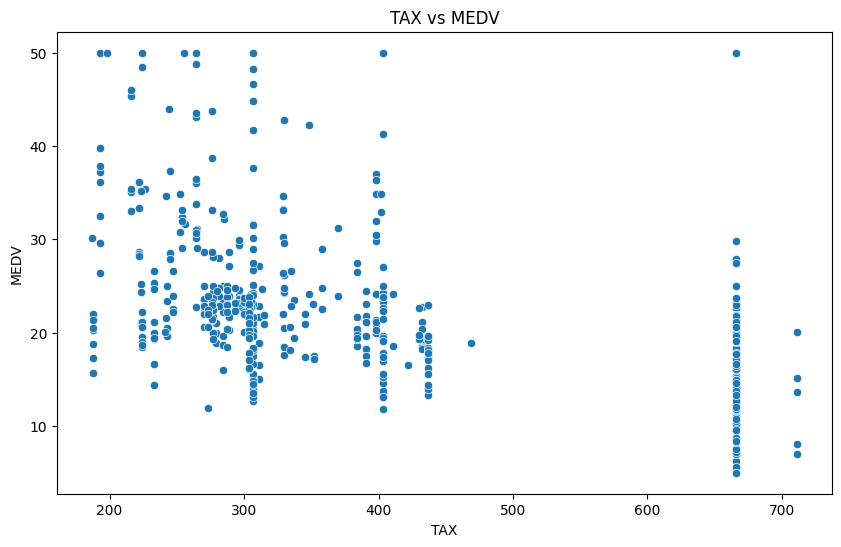

In [31]:
bivariate_analyzer.set_strategy(NumericalVsNumericalAnalysis())
bivariate_analyzer.analyze(df, 'TAX', 'MEDV')

### Insights:
- The points are widely scattered, suggesting that property tax rate (TAX) does not strongly predict home prices (MEDV).
-  The cluster around TAX ~700 shows more homes with lower prices, indicating that higher property taxes might negatively affect home values.

### PTRATIO VS MEDV

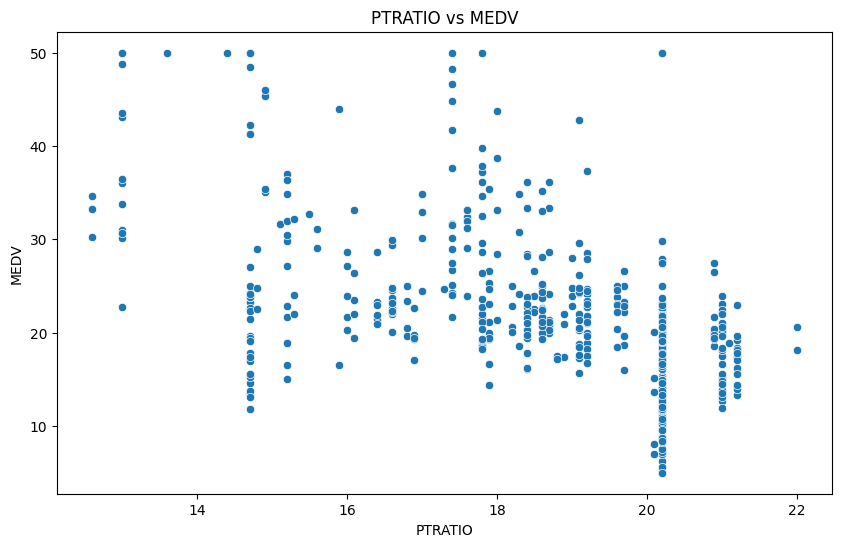

In [32]:
bivariate_analyzer.analyze(df, 'PTRATIO', 'MEDV')

### Insights:
- PTRATIO and MEDV have weak negative correlation.
- As pupil-teacher ratio (PTRATIO) increases, the median home price (MEDV) tends to decrease slightly, but the relationship is not strong.
- Areas with PTRATIO > 18 tend to have fewer high-priced homes, supporting the idea that higher student-teacher ratios may be linked to less expensive housing.

### B VS MEDV

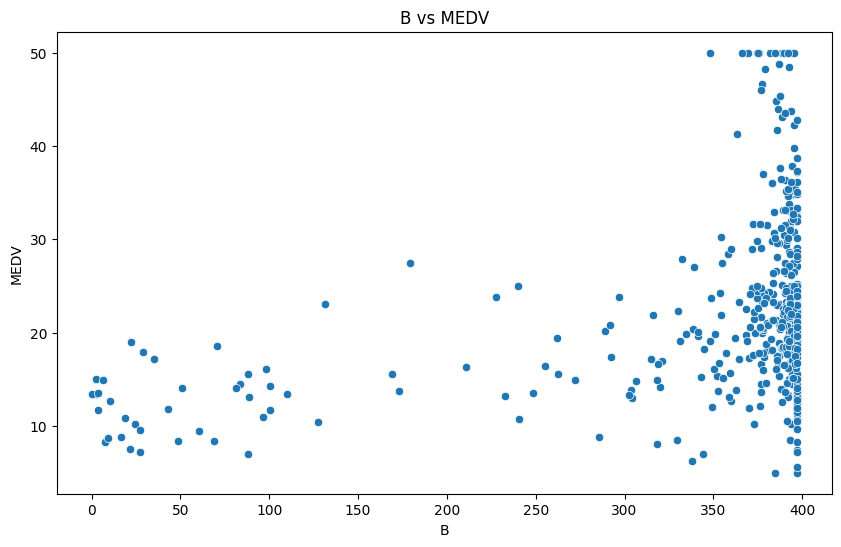

In [33]:
bivariate_analyzer.analyze(df, 'B', 'MEDV')

### Insights:
- B and MEDV have positive correlation.
- As B (an indicator of racial composition) increases, the median home value (MEDV) tends to increase.
- Most homes have B values near 400, indicating low racial diversity in many areas. These areas tend to have higher home prices.

### LSTAT VS MEDV

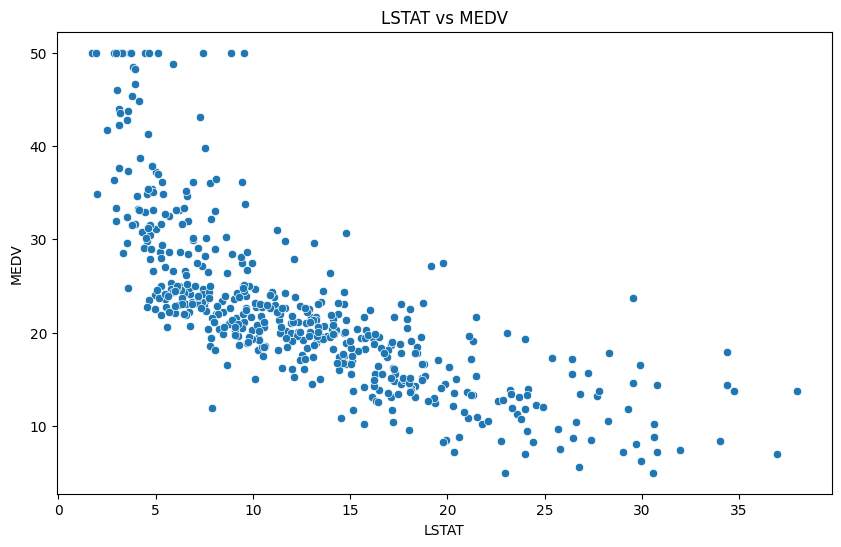

In [34]:
bivariate_analyzer.analyze(df, 'LSTAT', 'MEDV')

### Insights:
- LSTAT and MEDV have strong negative correlation.
- As LSTAT (percentage of lower-status population) increases, median home value (MEDV) decreases.
- The decline in MEDV is steeper at lower LSTAT values, suggesting that wealthier areas (low LSTAT) have significantly higher property values.

## Multivariate Analysis

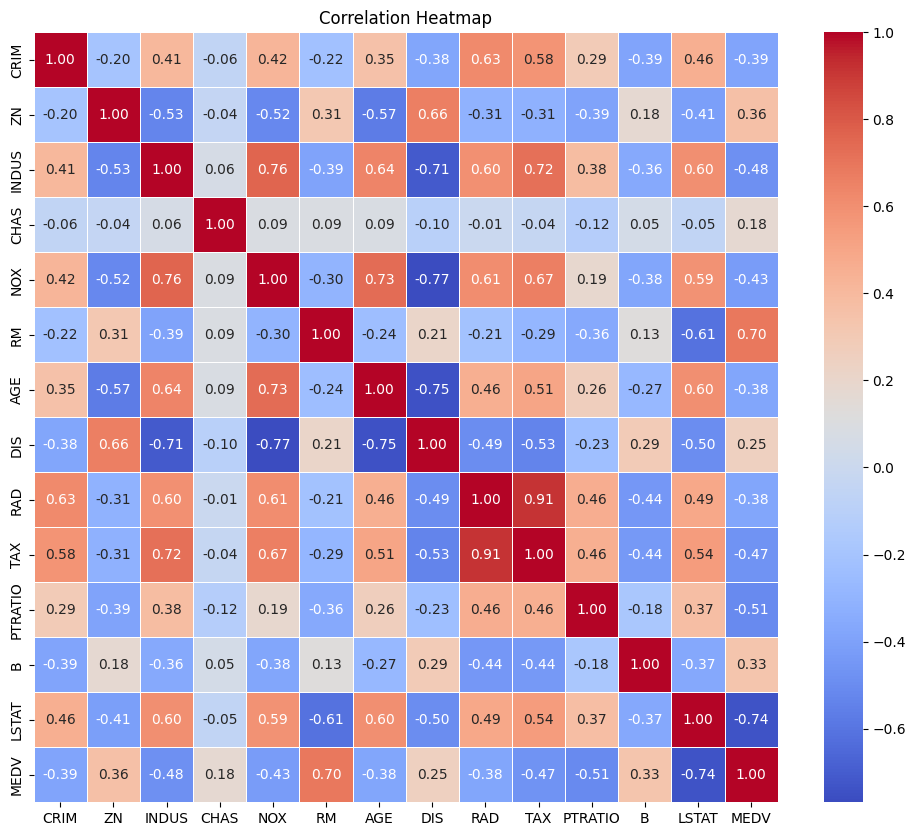

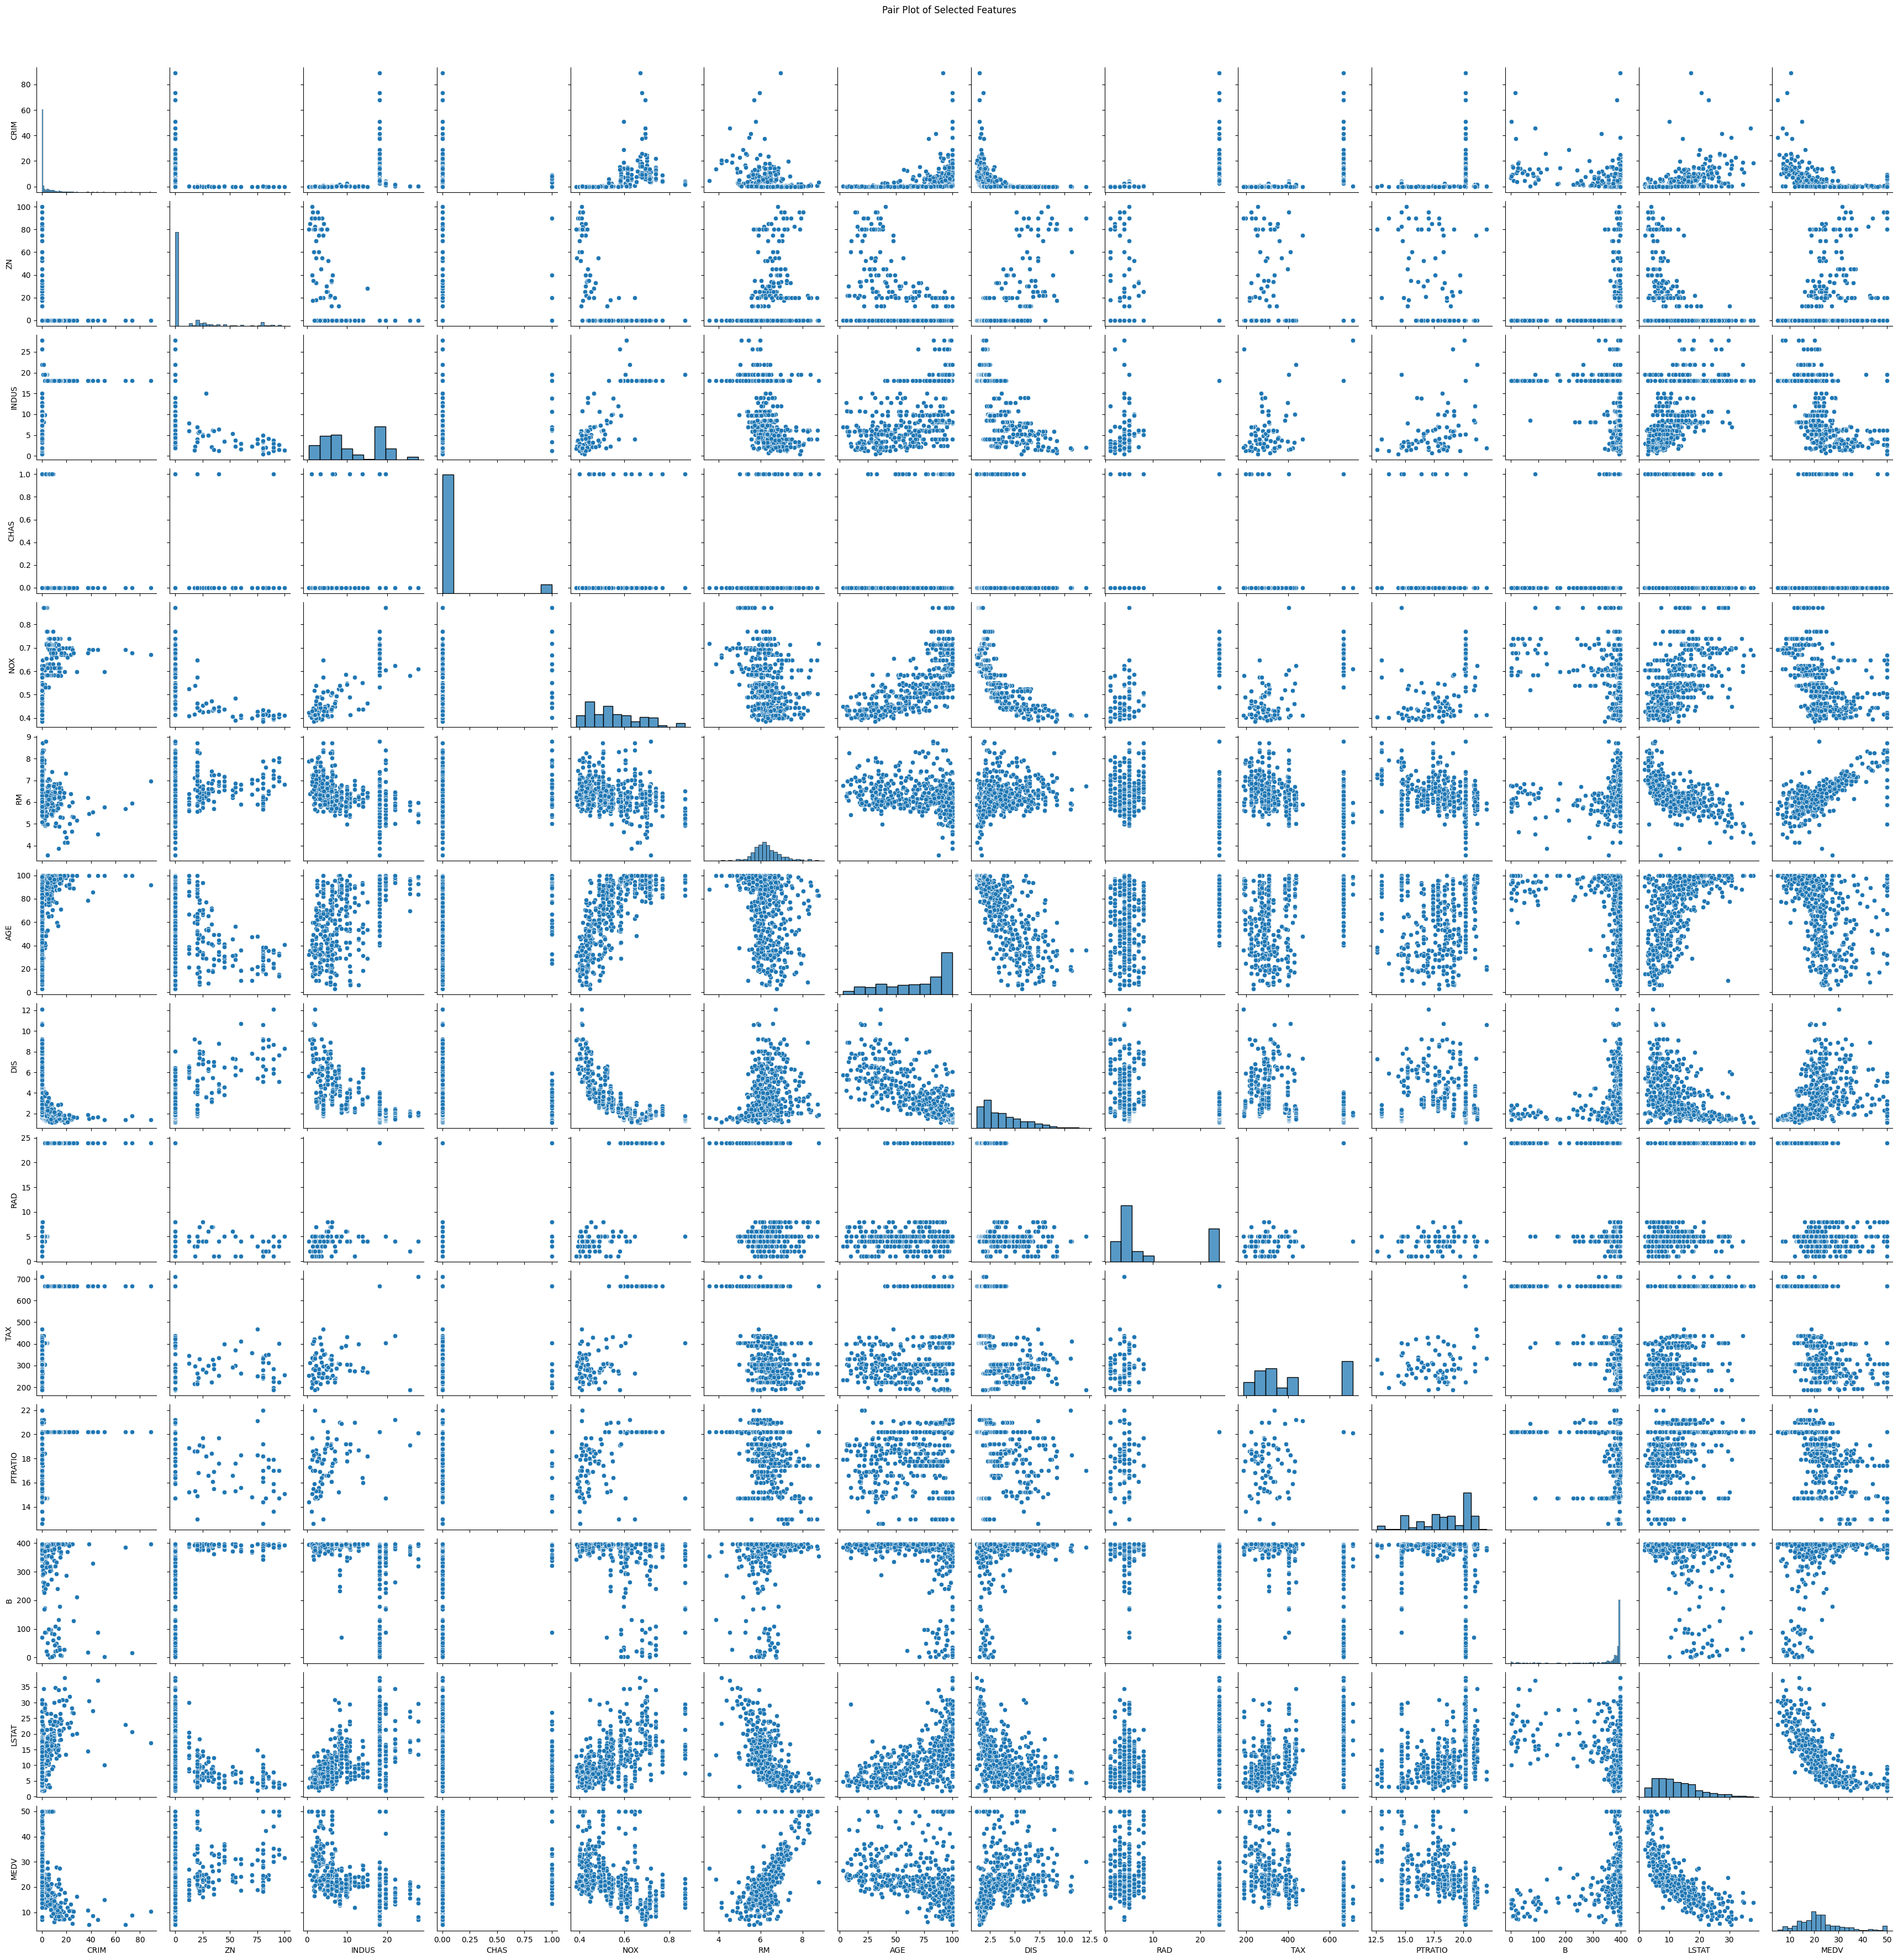

In [35]:
multivariate_analyzer = SimpleMultivariateAnalysis()
selected_features = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']]
multivariate_analyzer.analyze(selected_features)

### Insights:
- LSTAT (Lower status population %) has the strongest negative impact (-0.74).

    - Higher LSTAT → Lower home prices.

- RM (Avg. rooms per dwelling) is the strongest positive predictor (+0.70).

    - More rooms → Higher prices.

- PTRATIO (Pupil-teacher ratio, -0.51), NOX (Pollution, -0.43), and TAX (-0.47) negatively affect prices.

- TAX & RAD are highly correlated (+0.91).

    - Likely redundant → Drop one in models.

- NOX & INDUS (+0.76) suggest industrial areas have high pollution.

    - Consider keeping only one.

- DIS & INDUS (-0.71) indicate homes farther from employment centers have less industrialization.

- LSTAT vs MEDV shows a clear non-linear trend (exponential decay).

    - May benefit from transformation (e.g., log or polynomial regression).

- CRIM has a right-skewed distribution.

    - Most homes have low crime rates, but some extreme outliers exist.

- PTRATIO & MEDV show a moderate negative trend but with scatter.

- Strong predictors: RM, LSTAT, PTRATIO, TAX, NOX.

- Check for redundancy: TAX vs RAD, INDUS vs NOX.

- Consider feature transformations for LSTAT & CRIM.